---
title: "3D Mesh Analysis and Cleaning"
author: "Nils Fahrni, Etienne Roulet"
date: "2025-03-28"
format:
  html:
    toc: true
    code-fold: true
    code-line-numbers: true
    embed-resources: true
    self-contained-math: true
  ipynb: default
jupyter: python3
---

# Abstract

This report presents a comprehensive analysis and cleaning pipeline for 3D pollen models reconstructed from orthogonal 2D images. We investigate the geometric integrity, spectral properties, and topological structure of the meshes using a series of experiments. Additionally, a full cleaning pipeline is provided to repair, normalize, and prepare the meshes for downstream applications such as machine learning, 3D printing, or visualization. The notebook is a explorative experimentation of the methods, its not for production use intended instead to legitimate the methods and the pipeline. The code is not optimized for performance, but rather for clarity and understanding of the methods used.
The analysis is structured around five key experiments: watertightness assessment, Fourier analysis, convex hull analysis, graph Laplacian spectrum analysis, and shape distribution analysis. Each experiment is designed to provide insights into the structural characteristics of the pollen models, identify potential issues, and facilitate the cleaning process. The results of the analyses are visualized and discussed to highlight key findings and implications for future work.

# Introduction

Accurate 3D reconstruction of pollen from 2D images is crucial for understanding their structural characteristics. However, models obtained through such processes may contain reconstruction errors, missing data, or topological inconsistencies. This notebook outlines a systematic approach to:

- Assess the watertightness of the meshes.
- Analyze structural features via Fourier (spectral) decomposition.
- Evaluate geometric complexity through convex hull and graph Laplacian spectrum analyses.
- Statistically characterize the shape using the D2 shape function.
- Execute a full cleaning pipeline to repair and normalize the meshes.

# Materials and Methods

## Analysis Methods

The analysis is structured around five key experiments:

### 1. Watertight Status Analysis
- **Objective:** Determine if the 3D models are fully enclosed or contain holes and gaps.
- **Importance:** 
  - Essential for volume estimation and physical simulations.
  - Identifies incomplete or erroneous reconstructions.
  - Critical for successful 3D printing.
- **Expected Findings:**
  - Watertight models exhibit well-defined volumes.
  - Non-watertight models may indicate reconstruction or processing errors.

### 2. Fourier Analysis (Spectral Decomposition)
- **Objective:** Analyze the frequency components of voxelized pollen models to detect underlying structural patterns.
- **Importance:** 
  - Reveals periodicity and symmetry in the models.
  - Aids in species classification based on spectral characteristics.
- **Expected Findings:**
  - Symmetrical models should show low-frequency dominance.
  - Models with intricate textures will exhibit higher-frequency variations.

### 3. Convex Hull Analysis
- **Objective:** Compare the volume and surface area of the model with its convex hull.
- **Importance:** 
  - Provides insights into the structural complexity.
  - Facilitates more accurate volume estimations.
- **Expected Findings:**
  - Spiky or irregular models will differ significantly from their convex hull.
  - Smooth models will closely approximate their hull measurements.

### 4. Graph Laplacian Spectrum Analysis
- **Objective:** Assess mesh connectivity and detect disconnected components using spectral graph theory.
- **Importance:** 
  - Highlights areas of poor connectivity or isolated mesh segments.
  - Useful for comparing the topological structure of different models.
- **Expected Findings:**
  - Well-connected meshes produce a smooth Laplacian spectrum.
  - Broken or irregular meshes result in a noisy spectrum.

### 5. Shape Distribution (D2 Shape Function)
- **Objective:** Perform a statistical analysis of pairwise surface point distances to characterize overall shape.
- **Importance:** 
  - Acts as an orientation-independent shape descriptor.
  - Useful for classification and comparison of 3D models.
- **Expected Findings:**
  - Spherical models yield narrow distributions.
  - Irregular models show a broader spread of distances.

## Software and Tools

The analysis utilizes a suite of Python libraries and custom classes:
- **Python Standard Libraries:** `os`, `sys`, `random`
- **Scientific Libraries:** `numpy`, `matplotlib`, `cv2` (OpenCV), `PIL`
- **Custom Modules:**  
  - `PollenDataset` for data handling.
  - `MeshAnalyzer` for exploration and statistical evaluation.
  - `MeshExplorer` for advanced analysis.
  - `MeshCleaner` for the repair and normalization pipeline.
- **Environment Management:** `dotenv` to load configuration variables.

# Experiment 1: Mesh Exploration

In this experiment, the `MeshAnalyzer` class is used to conduct an initial exploration of the mesh dataset. The analysis focuses on watertightness, Euler characteristics, and sample visualizations.

In [1]:
import os
import sys
import random
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from dotenv import load_dotenv

load_dotenv()

sys.path.append("..")
from data import PollenDataset, MeshAnalyzer, MeshCleaner, MeshExplorer

## Running the Exploration

The following code instantiates the analyzer and runs a series of exploratory analyses.

In [2]:
# Instantiate the MeshAnalyzer and run the exploration pipeline
analyzer = MeshAnalyzer()
df_results = analyzer.run_exploration()

Running exploratory analysis of 3D models...


Analyzing models: 100%|██████████| 207/207 [03:31<00:00,  1.02s/it]

Analyzed 207 models.
Watertight models: 114 of 207 (55.1%)

Exploratory analysis completed. Check the 'mesh_analysis' folder for saved CSV files.


## Visualizations & Initial Analysis

Visualizations help to inspect key properties and potential issues within the mesh dataset.

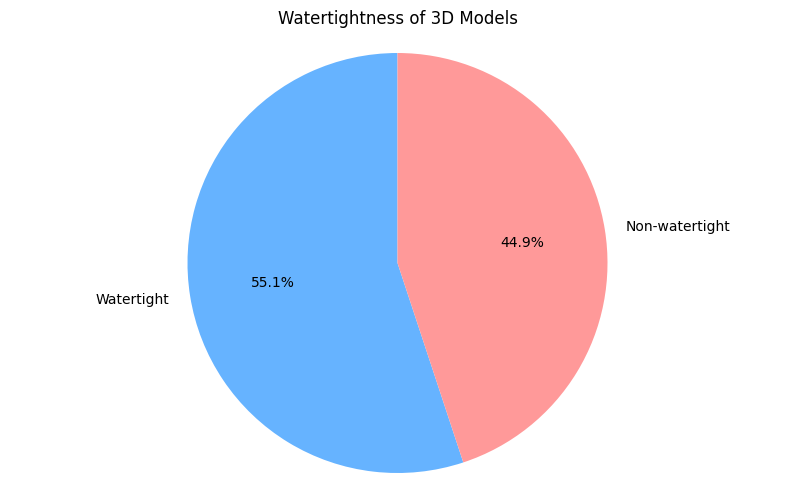

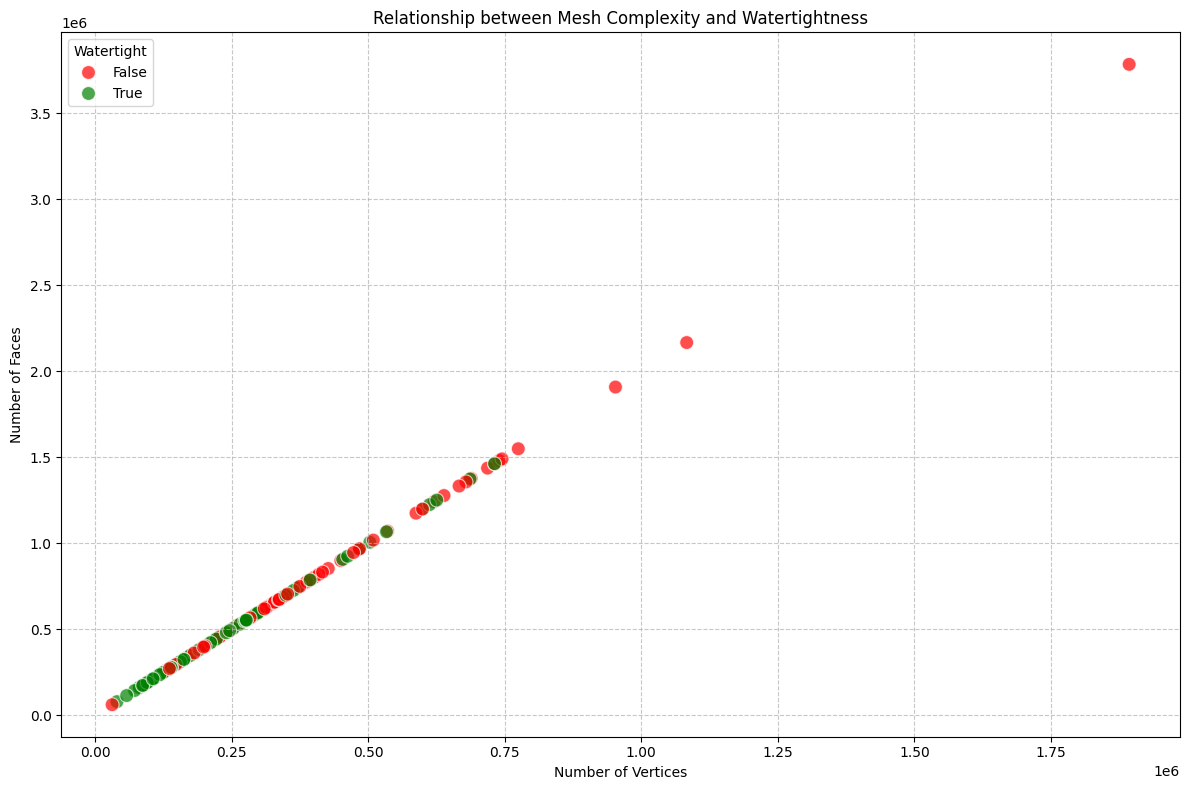

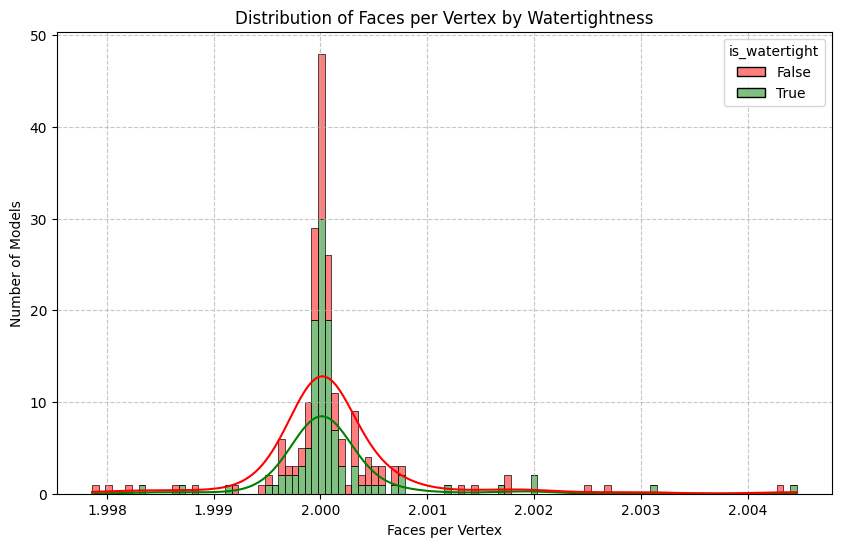

In [3]:
# Visualize watertight status of the models
analyzer.visualize_watertightness(df_results)

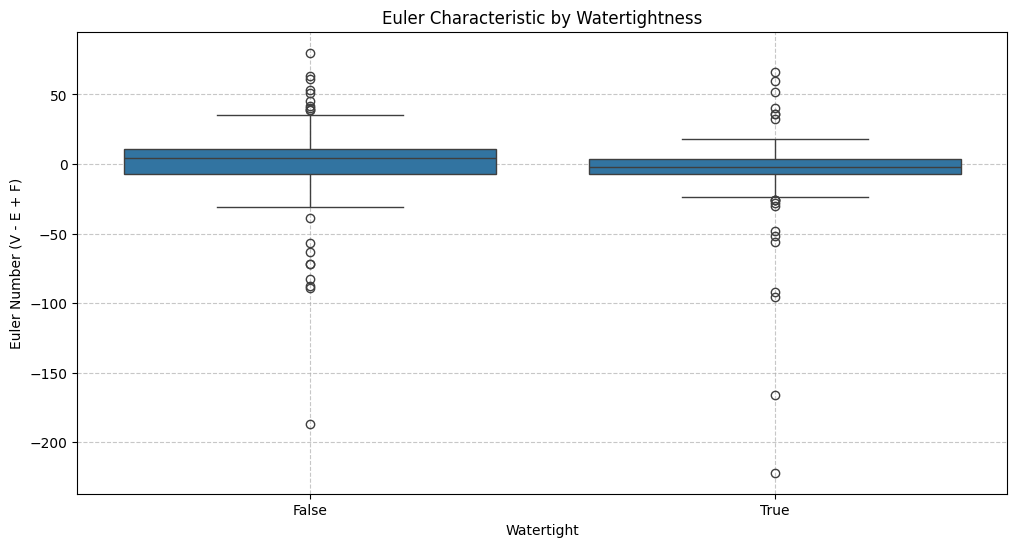

In [4]:
# Analyze Euler characteristics to assess mesh integrity
analyzer.analyze_euler_characteristics(df_results)

**Findings:**
- _TODO: Summarize observations regarding watertightness and Euler characteristics._

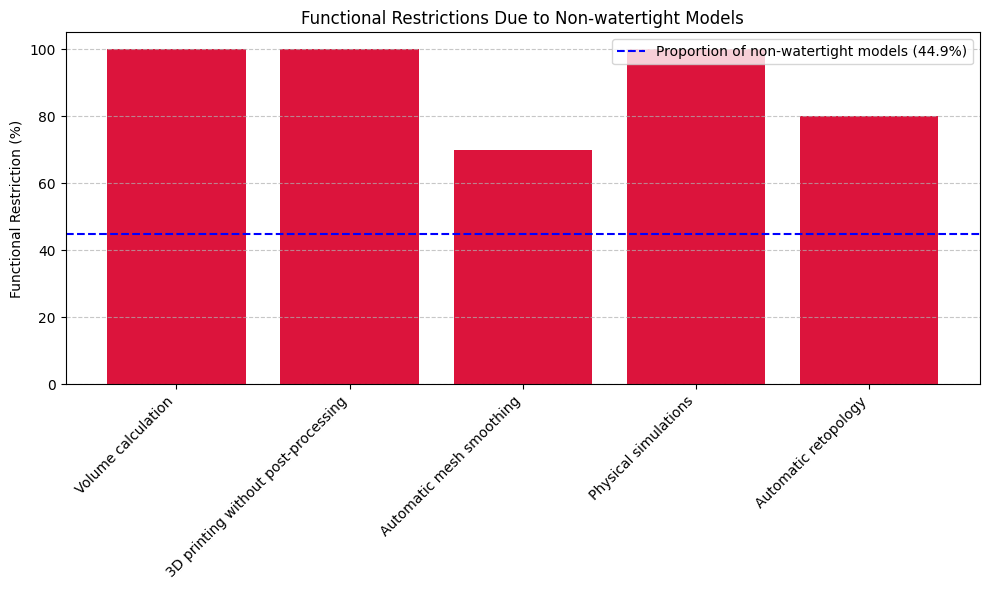

,Operation,Works with non-watertight models
0,Volume calculation,No - Volume not defined
1,3D printing without post-processing,No - Printing problems likely
2,Automatic mesh smoothing,Partially - Results unreliable
3,Physical simulations,No - Physics requires closed volumes
4,Automatic retopology,Partially - Poor results likely
5,Watertightness required for successful operation,Yes


In [5]:
# Compute implications of non-watertight meshes (e.g., missing volume, reconstruction errors)
analyzer.compute_implications_of_non_watertight(df_results)

**Findings:**
- _TODO: Document the impact of non-watertightness on subsequent analyses._

c:\Users\super\Documents\GitHub\sequoia\.venv\Lib\site-packages\pyglet\libs\win32\__init__.py:318: UserWarning: Could not set COM MTA mode. Unexpected behavior may occur.
  warnings.warn("Could not set COM MTA mode. Unexpected behavior may occur.")


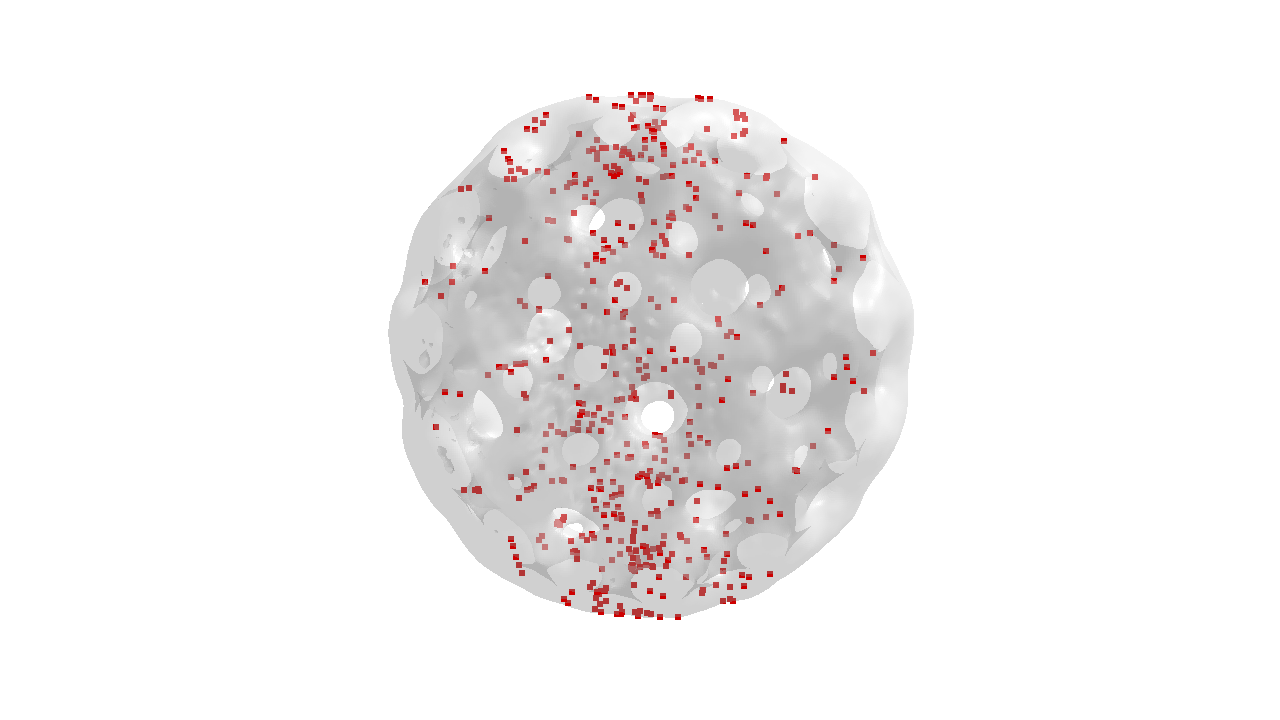

Visualization created for 20610_Spear-leaved_orache_Atriplex_hastata_pollen_grain.stl


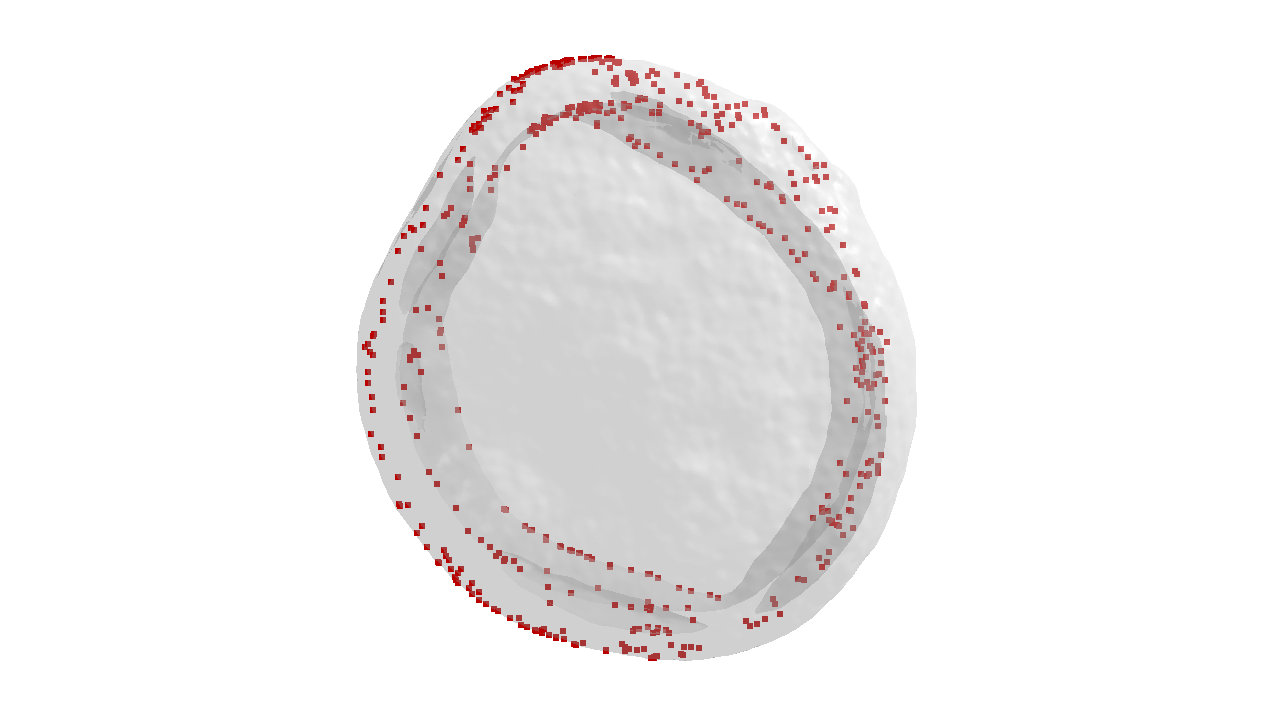

Visualization created for 21375_Timothy_Phleum_pratense_pollen_grain_shrunken.stl


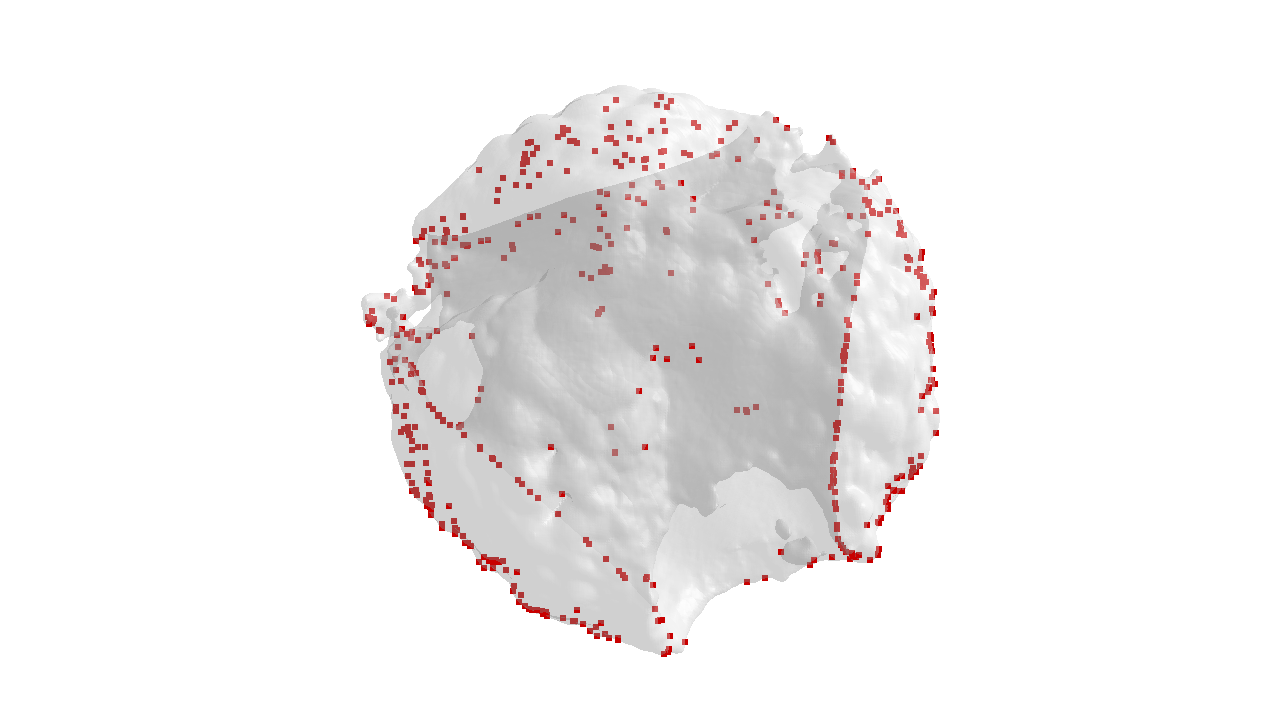

Visualization created for 17831_Common_holly_Ilex_aquifolium_pollen_grain.stl


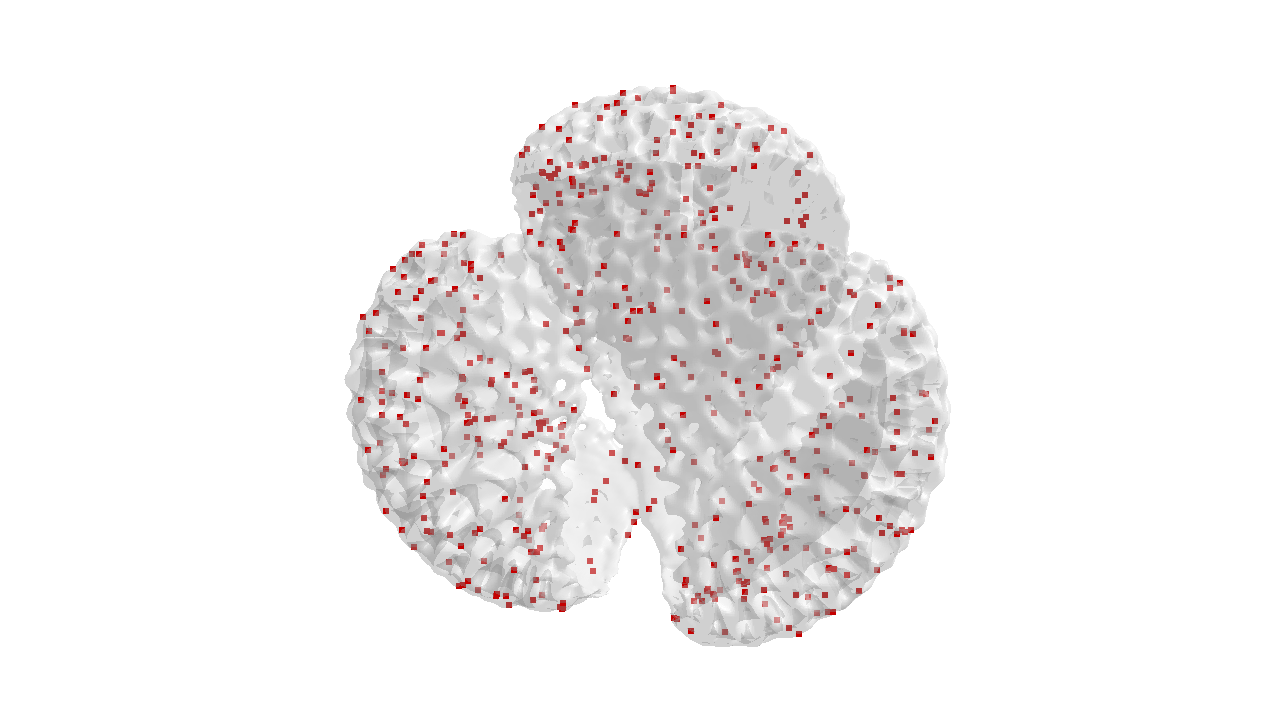

Visualization created for 20611_Cuckoo_flower_Cardamine_pratensis_pollen_grain.stl


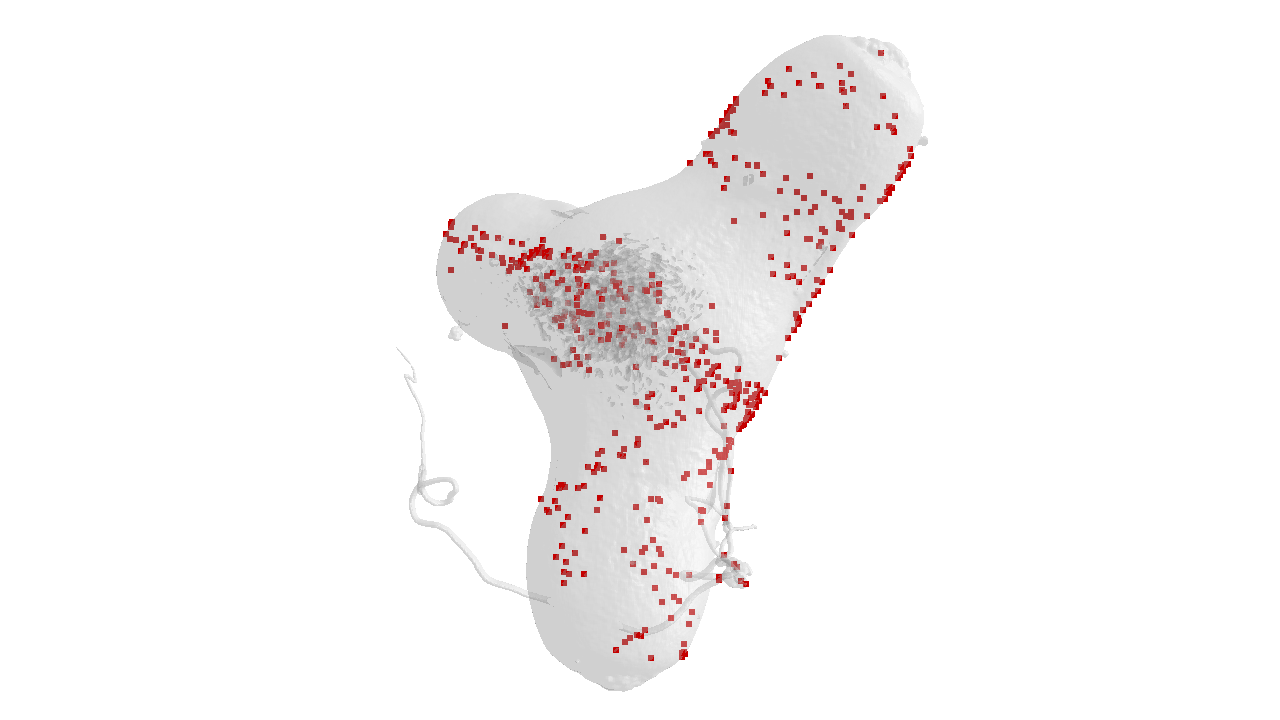

Visualization created for 17883_Evening_primrose_Oenothera_fruticosa_pollen_grain.stl


In [6]:
# Visualize a set of sample models for qualitative assessment
analyzer.visualize_sample_models(df_results)

**Findings:**
- _TODO: Note any common patterns or irregularities observed in the sample visualizations._

In [7]:
# Perform convex hull analysis to compare geometric complexity
analyzer.convex_hull_analysis()

Computing Convex Hulls: 100%|██████████| 207/207 [02:11<00:00,  1.58it/s]


,file_name,volume,area
0,17767_Common_knapweed_Centaurea_nigra_pollen_g...,18316.091570,3421.832503
1,17775_Chive_Allium_schoenoprasum_pollen_grain.stl,3232.520149,1199.330173
2,17776_Sweet_alyssum_Lobularia_maritima_pollen_...,2248.929430,895.521644
3,17777_Blackberry_Rubus_fruticosus_pollen_grain...,10293.755190,2366.595126
4,17778_Willow_Salix_alba_pollen_grain.stl,3069.495034,1039.880399
...,...,...,...
202,21602_Common_fleabane_Pulicaria_dysenterica_po...,12827.680510,2704.961318
203,21603_Common_wintergreen_Pyrola_minor_pollen_g...,28960.462673,4808.076916
204,21611_European_pear_Pyrus_communis_pollen_grai...,33169.458075,5096.291487
205,21618_Slender_barb_grass_Parapholis_strigosa_p...,45558.374944,7000.607398


In [ ]:
# Calculate and visualize the shape distribution (D2 Shape Function)
shape_distribution = analyzer.shape_distribution()
analyzer.visualize_shape_distribution(shape_distribution)

Computing Shape Distributions:  30%|██▉       | 62/207 [01:01<03:37,  1.50s/it]

Error processing 17883_Evening_primrose_Oenothera_fruticosa_pollen_grain.stl: Unable to allocate 93.1 MiB for an array with shape (4069776, 3) and data type float64


Computing Shape Distributions:  39%|███▊      | 80/207 [01:23<02:01,  1.04it/s]

Error processing 20471_Herb-Robert_Geranium_robertianum_pollen_grain.stl: 


Computing Shape Distributions:  47%|████▋     | 97/207 [01:40<01:25,  1.28it/s]

Error processing 20707_Primrose_Primula_vulgaris_pollen_grain.stl: Unable to allocate 381. MiB for an array with shape (49995000,) and data type float64


Computing Shape Distributions:  93%|█████████▎| 192/207 [02:56<00:18,  1.22s/it]

Error processing 21552_Black_mullein_Verbascum_nigrum_pollen_grain.stl: Unable to allocate 381. MiB for an array with shape (49995000,) and data type float64


Computing Shape Distributions:  97%|█████████▋| 201/207 [03:05<00:06,  1.01s/it]

Error processing 21600_Common_haircap_Polytrichum_commune_spore.stl: Unable to allocate 381. MiB for an array with shape (49995000,) and data type float64


Computing Shape Distributions: 100%|██████████| 207/207 [03:12<00:00,  1.08it/s]


# Experiment 2: Advanced Analysis

Advanced techniques are employed to further interrogate mesh properties using the `MeshExplorer` class. This includes detailed spectral and topological analyses.

In [ ]:
# Instantiate the MeshExplorer and run advanced analyses
explorer = MeshExplorer()
adv_results = explorer.run_advanced_analysis()
display(adv_results)

In [ ]:
# Visualize advanced mesh properties (e.g., spectral graphs, connectivity metrics)
explorer.visualize_advanced_properties(adv_results)

**Findings:**
- _TODO: Summarize key insights from the advanced property visualizations._

In [ ]:
# Apply dimensionality reduction to explore the intrinsic structure of the mesh dataset
explorer.perform_dimensionality_reduction(adv_results)

**Findings:**
- _TODO: Discuss the outcomes of the dimensionality reduction and any clustering patterns observed._

# Experiment 3: 3D Model Cleaning Pipeline

The `MeshCleaner` class implements a robust pipeline to repair and standardize the 3D meshes. This pipeline is essential for preparing the dataset for further processing.

## Overview of the Cleaning Pipeline

Key stages of the pipeline include:
- **Analysis:** Generating geometry statistics and quality reports.
- **Hole Filling:** Utilizing multiple strategies:
  1. **Small Holes:** Quick repair using `trimesh.fill_holes()`.
  2. **Medium Holes:** Robust repair via `vtkFillHolesFilter`.
  3. **Complex Holes:** Advanced repair using `manifold3d`.
- **Normalization:** Centering, scaling, and reorienting the mesh.
- **Visualization:** Producing charts and summaries for quality assurance.

## Running the Cleaner

In [ ]:
# Instantiate the MeshCleaner and process all STL files in the dataset
cleaner = MeshCleaner()
cleaner.process_all()

## Visualizing Cleaning Results

After processing, results are visualized to assess the effectiveness of the cleaning pipeline.

In [ ]:
# Placeholder: Add visualization code for cleaned mesh results (e.g., before/after comparisons)
# Example:
# cleaner.visualize_cleaning_results()

# Findings and further steps of the analysis for the preprocessing pipeline
- todo: Summarize the effectiveness of the cleaning pipeline based on visualizations and statistics.

# Conclusion

This report outlines a comprehensive framework for the analysis and cleaning of 3D pollen models. The experiments covered:
- Initial mesh exploration and watertightness assessment.
- Advanced spectral and topological analyses.
- A multi-stage cleaning pipeline for mesh repair and normalization.

Future work will focus on refining the cleaning methods and further automating quality assessments to support robust downstream applications.